# Malnutrition Tutorial

This tutorial demonstrates how to use the **malnutrition comorbidity module** in the `tbsim` package.

**Module Location:** `tbsim/comorbidities/malnutrition/`

---

## Overview

The malnutrition module in TBSim allows users to simulate the impact of **malnutrition on TB disease dynamics**. Malnutrition is a significant risk factor for TB, affecting both susceptibility to infection and disease progression.

This tutorial shows how to:
- Set up a basic malnutrition simulation
- Configure malnutrition parameters
- Run the simulation and visualize results

---

## Malnutrition Model

The malnutrition model simulates nutritional status and its impact on health outcomes. Key features include:

- **Nutritional Status Tracking**: Monitors individual nutritional states
- **Health Impact**: Affects susceptibility to diseases and recovery rates
- **Demographic Integration**: Works with birth and death processes

### Key Parameters

| Parameter | Description |
|-----------|-------------|
| `init_prev` | Initial prevalence of malnutrition in the population |
| `recovery_rate` | Rate at which individuals recover from malnutrition |
| `susceptibility_multiplier` | Multiplier for disease susceptibility when malnourished |

---

## Setup and Imports

First, import the required modules:


In [27]:
import tbsim
import starsim as ss
import matplotlib.pyplot as plt
import numpy as np


## Building the Malnutrition Simulation

The `make_malnutrition()` function creates a complete simulation with malnutrition as the primary disease model:


In [28]:

def make_malnutrition():
    # --------- Disease ----------
    nut_pars = dict()  # Use default malnutrition parameters
    nut = tbsim.Malnutrition(nut_pars)
    
    # --------- People ----------
    n_agents = 200  # Small population for demonstration
    pop = ss.People(n_agents=n_agents)
    
    # -------- Simulation Parameters -------
    sim_pars = dict(
        dt=ss.days(7),                    # Weekly time steps
        start=ss.date('1990'),      # Simulation start date
        stop=ss.date('2020'),       # Simulation end date (30 years)
    )
    
    # -------- Contact Network ----------
    net = ss.RandomNet(dict(
        n_contacts=ss.poisson(lam=5),     # Average 5 contacts per agent
        dur=0                             # Instantaneous contacts
    ))
    
    # -------- Demographics ------------
    births = ss.Births(pars=dict(birth_rate=5))    # 5 births per 1000 per year
    deaths = ss.Deaths(pars=dict(death_rate=5))    # 5 deaths per 1000 per year
    
    # -------- Assemble Simulation -----
    sim = ss.Sim(
        people=pop, 
        diseases=nut, 
        demographics=[deaths, births],
        networks=net,
        pars=sim_pars,
        verbose=0,
    )
    return sim


## Running the Simulation

Execute the simulation and visualize the results:


/Users/mine/newgit/newtbsim/venv/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/Users/mine/newgit/newtbsim/venv/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2324: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


Saved figure to /Users/mine/newgit/newtbsim/docs/tutorials/results/scenarios_20250908_112610.png


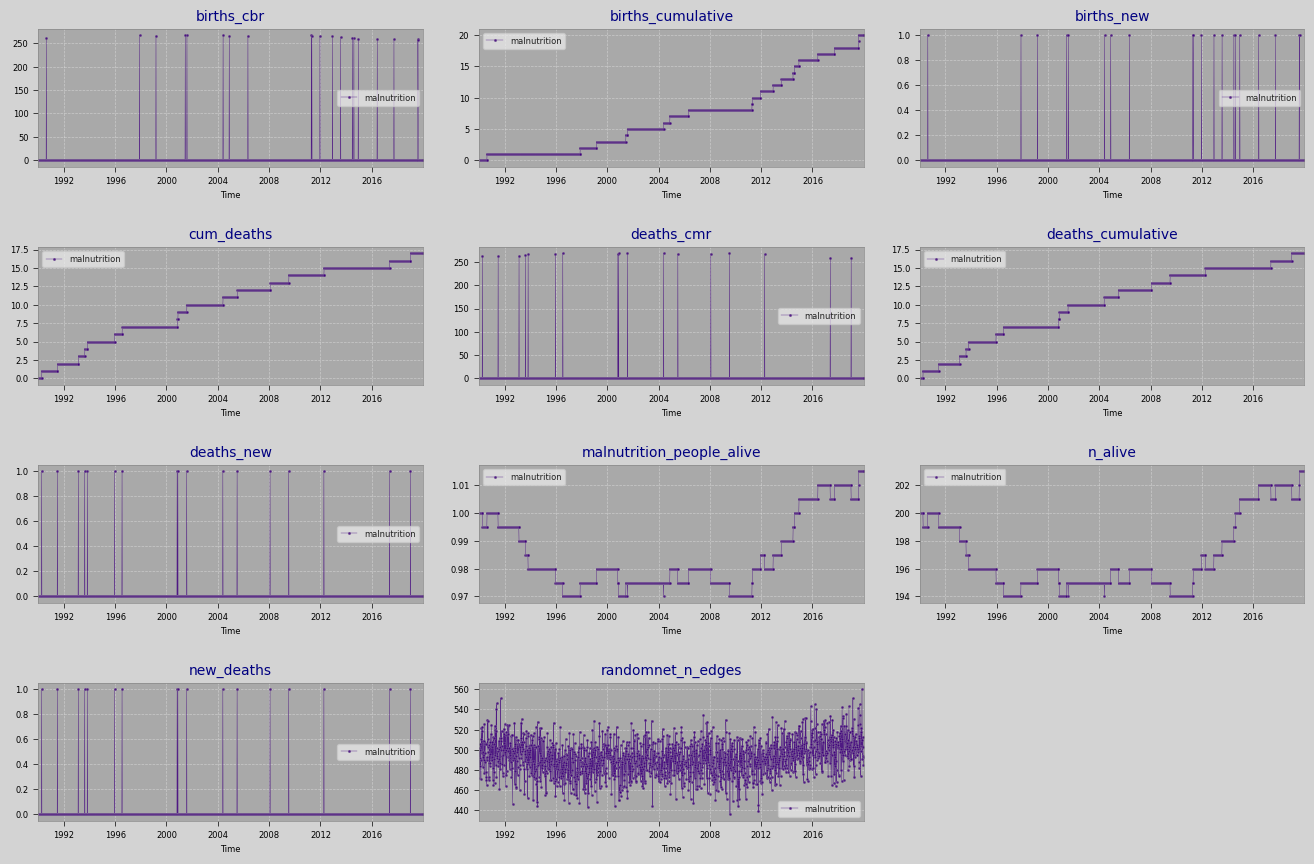

In [29]:
# Create and run the malnutrition simulation
sim_n = make_malnutrition()
sim_n.run()

# Process results for visualization
results = {'malnutrition': sim_n.results.flatten()}

# Plot results with 3 columns in dark mode
tbsim.plot_combined(results, n_cols=3, dark=True, cmap='Purples')
plt.show()


## Key Parameters Explained

- **dt**: Time step duration (7 days = weekly updates)
- **n_agents**: Population size (200 agents for demonstration)
- **n_contacts**: Number of contacts per agent (Poisson distribution with mean 5)
- **birth_rate/death_rate**: Demographic rates per 1000 population per year
- **Simulation period**: 30 years (1990-2020)

## Expected Output

The simulation will generate plots showing:
- Malnutrition prevalence over time
- Population demographics (births, deaths)
- Contact network statistics
- Nutritional status transitions

## Extending the Model

This basic malnutrition model can be extended to:
- Include TB as a comorbidity
- Add nutritional interventions
- Model seasonal variations in nutrition
- Include age-specific nutritional requirements

For more complex scenarios, see the TB-malnutrition comorbidity examples in the interventions tutorials.
